In [ ]:
#Обучить модель и предсказать успешность кампании для каждого клиента.
#Рассчитать accuracy, f1, roc_auc_score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

plt.style.use('ggplot')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('./dataframebank/bank.csv', encoding='UTF-8', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
x = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()

In [5]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

In [6]:
x = pd.get_dummies(x)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
y_train.shape, y_test.shape

((3616,), (905,))

In [9]:
#Линейная регрессия

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_test_prediction = model.predict(x_test)
y_test_prediction

array([ 1.88227805e-02,  7.12960681e-01,  1.34431334e-01, -5.19111933e-02,
        2.32765908e-01,  3.72330863e-02,  4.60515960e-02,  7.18197088e-02,
       -1.02056492e-01,  1.72537744e-01, -5.94907743e-02,  7.04341832e-02,
        8.42110713e-02,  1.16511462e-01,  1.90189344e-01,  6.17749143e-01,
        2.10982875e-03,  2.25000176e-01,  2.77539734e-02,  9.03174312e-02,
       -2.93782516e-02,  2.11317266e-02,  3.85576516e-02, -4.12154626e-02,
       -2.40724188e-03,  6.52744368e-02,  2.12568064e-02,  3.81552851e-01,
       -2.49852638e-02,  3.27135056e-01,  3.65830180e-01,  4.87425651e-02,
       -3.77245056e-02, -5.82092827e-03, -3.48788837e-03,  7.56684953e-02,
        3.12851739e-02,  6.61709443e-02,  6.64168558e-02,  1.11870957e-01,
       -1.21926673e-02,  7.56048684e-01,  1.79513278e-01,  4.73783731e-01,
        9.80997857e-02, -7.68716789e-03,  1.61981948e-01, -8.62069575e-02,
        3.48947888e-02,  3.48881805e-01, -3.96873657e-03,  1.41866257e-01,
       -1.13642807e-02,  

In [10]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print('Test accuracy: ', accuracy_score(y_test, y_test_prediction > 0.2))
print('Test F measure: ', f1_score(y_test, y_test_prediction > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_test_prediction))

Test accuracy:  0.856353591160221
Test F measure:  0.49218749999999994
Test ROC-AUC:  0.8808382903723286


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
plt.style.use('ggplot')

In [12]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
df = pd.read_csv('./dataframebank/bank-additional-full.csv', encoding='UTF-8', sep=';')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
df['marital'].astype('<U8')

0        married
1        married
2        married
3        married
4        married
          ...   
41183    married
41184    married
41185    married
41186    married
41187    married
Name: marital, Length: 41188, dtype: object

In [16]:
x = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()

y = LabelBinarizer().fit_transform(y).ravel()

In [17]:
x = pd.get_dummies(x)

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
y.mean()

0.11265417111780131

In [21]:
from sklearn.svm import SVC

In [22]:
#Опорные вектора
model_svm = SVC(kernel='linear', class_weight='balanced')
model_svm.fit(x_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [23]:
y_test_prediction = model_svm.predict(x_test)
y_test_prediction

array([0, 1, 0, ..., 0, 0, 1])

In [24]:
print('Test accuracy: ', accuracy_score(y_test, y_test_prediction))
print('Test F measure: ', f1_score(y_test, y_test_prediction))

Test accuracy:  0.8863801893663511
Test F measure:  0.5726027397260274


In [25]:
#Логистическая регрессия
model_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
model_logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
y_test_prediction = model_logistic.predict_proba(x_test)[:,1]
y_test_prediction

array([0.01459632, 0.84197841, 0.00917698, ..., 0.09630301, 0.07228175,
       0.26564656])

In [43]:
print('Test accuracy: ', accuracy_score(y_test, y_test_prediction > 0.2))
print('Test F measure: ', f1_score(y_test, y_test_prediction > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_test_prediction))

Test accuracy:  0.8914785142024764
Test F measure:  0.6106271777003484
Test ROC-AUC:  0.9325157373263306


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def roc_curve_function(x_test, y_test, lr):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig("ROC.png")
    plt.show()

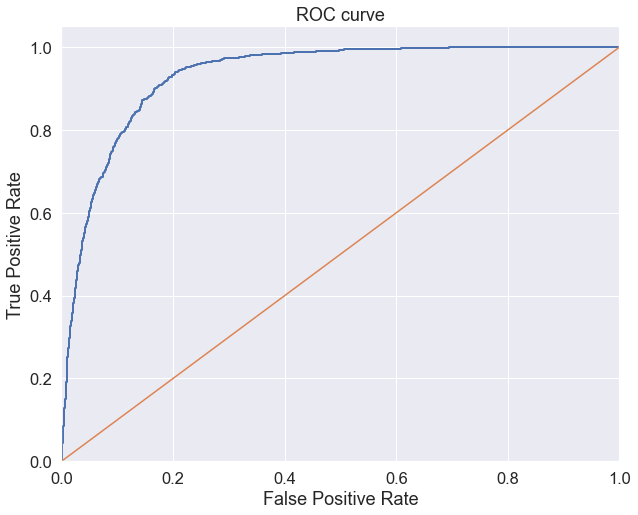

In [45]:
roc_curve_function(x_test, y_test, model_logistic)